In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import dataframe_image as dfi
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 70 #define 300 dpi for saving figures
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':70}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [32]:
dfes = pd.read_csv('../RR_Quan_2m_dataset.csv')
dfes['FID_RiverRd_AOI'] = np.where(dfes['NWI_bi']=='wetland', 1, 0)
dfes['NWI_bi'].value_counts()

wetland       13730
nonwetland     7077
Name: NWI_bi, dtype: int64

In [5]:
#Identifier is MIN, MAX, MEAN, RANGE etc.
def create_heatmap(identifier, ax, title):
    cols = []
    for (columnName, columnData) in dfes.iteritems():
        if identifier in columnName:
            cols.append(columnName)
    dfes_temp = pd.DataFrame(dfes, columns=cols)
    corr = dfes_temp.corr()
    ax.set_title(title)
    sns.heatmap(corr, cmap="Blues", ax=ax, square=True)

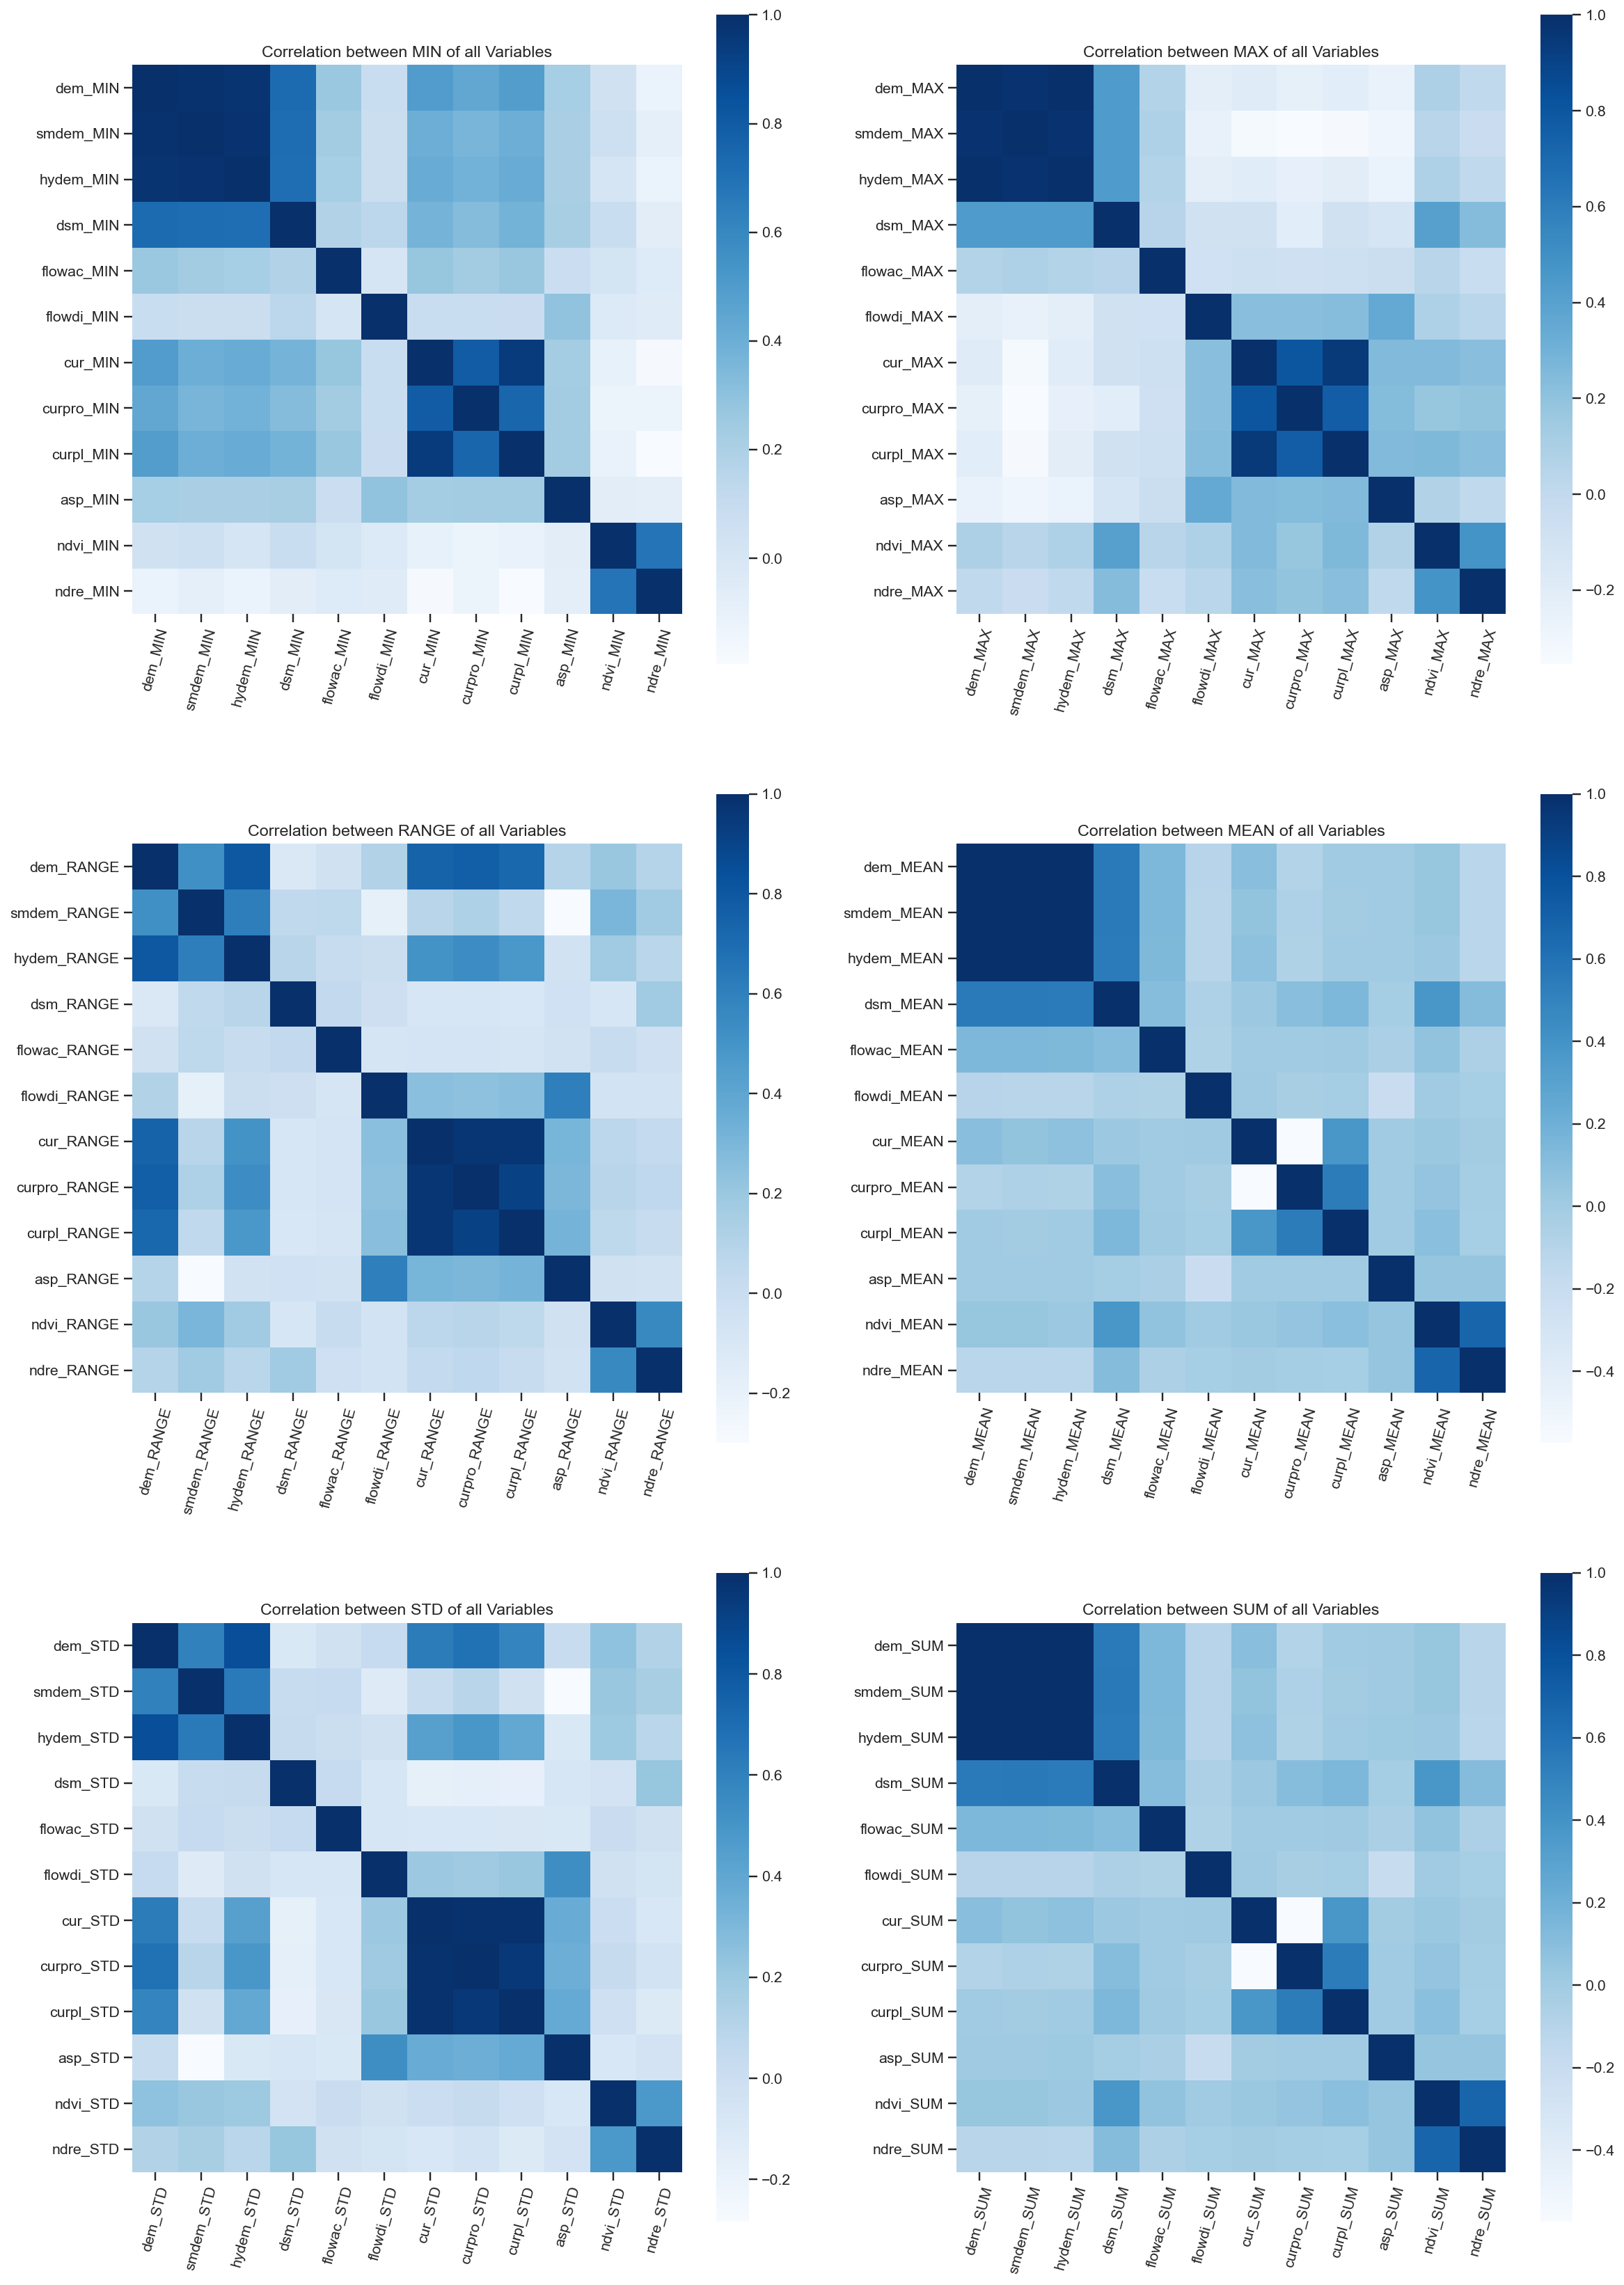

In [9]:
identifier_list = ["MIN", "MAX", "RANGE", "MEAN", "STD", "SUM"]
fig,axn = plt.subplots(3, 2, figsize=(20,30))
i = 0
for ax in axn.flat:
    create_heatmap(identifier_list[i], ax, f"Correlation between {identifier_list[i]} of all Variables")
    ax.tick_params(axis='x', labelrotation=75)
    i+=1
fig.savefig('../Images/corr_heatmap.jpg')

In [24]:
corr = dfes.corr()
df_corr = pd.DataFrame(corr['FID_RiverRd_AOI'])
df_corr = df_corr[:-1].sort_values(by=["FID_RiverRd_AOI"])
pd.set_option('display.max_rows', None)
df_corr

,FID_RiverRd_AOI
dem_MIN,-0.594811
smdem_MAX,-0.570179
smdem_MEAN,-0.565102
smdem_SUM,-0.563808
smdem_MIN,-0.560004
dem_MEAN,-0.559542
dem_SUM,-0.558299
hydem_MEAN,-0.557134
hydem_SUM,-0.555747
hydem_MIN,-0.555240


In [33]:
df_corr.abs()

,FID_RiverRd_AOI
dem_MIN,0.594811
smdem_MAX,0.570179
smdem_MEAN,0.565102
smdem_SUM,0.563808
smdem_MIN,0.560004
dem_MEAN,0.559542
dem_SUM,0.558299
hydem_MEAN,0.557134
hydem_SUM,0.555747
hydem_MIN,0.555240
